In [50]:
import requests

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

print(page.text)

<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Fake Python</title>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">
  </head>
  <body>
  <section class="section">
    <div class="container mb-5">
      <h1 class="title is-1">
        Fake Python
      </h1>
      <p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>
    </div>
    <div class="container">
    <div id="ResultsContainer" class="columns is-multiline">
    <div class="column is-half">
<div class="card">
  <div class="card-content">
    <div class="media">
      <div class="media-left">
        <figure class="image is-48x48">
          <img src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1" alt="Real Python Logo">
        </figure>
      </div>
      <div class="media-content">
        <h2 class="title is-

In [51]:
# pip install bs4
from bs4 import BeautifulSoup

soup = BeautifulSoup(page.content, "html.parser")
soup

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Fake Python</title>
<link href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css" rel="stylesheet"/>
</head>
<body>
<section class="section">
<div class="container mb-5">
<h1 class="title is-1">
        Fake Python
      </h1>
<p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>
</div>
<div class="container">
<div class="columns is-multiline" id="ResultsContainer">
<div class="column is-half">
<div class="card">
<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>

In [52]:
results = soup.find(id="ResultsContainer")
results

<div class="columns is-multiline" id="ResultsContainer">
<div class="column is-half">
<div class="card">
<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
</footer>
</div>
</div>
</div>
<div class="column is-half">


In [53]:
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)

python_job_cards = [
    h2_element.parent.parent.parent for h2_element in python_jobs
]

In [54]:
for job_card in python_job_cards:
    title_element = job_card.find("h2", class_="title")
    company_element = job_card.find("h3", class_="company")
    location_element = job_card.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    link_url = job_card.find_all("a")[1]["href"]
    print(f"Apply here: {link_url}\n")

Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA
Apply here: https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html

Software Engineer (Python)
Garcia PLC
Ericberg, AE
Apply here: https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html

Python Programmer (Entry-Level)
Moss, Duncan and Allen
Port Sara, AE
Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html

Python Programmer (Entry-Level)
Cooper and Sons
West Victor, AE
Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html

Software Developer (Python)
Adams-Brewer
Brockburgh, AE
Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html

Python Developer
Rivera and Sons
East Michaelfort, AA
Apply here: https://realpython.github.io/fake-jobs/jobs/python-developer-50.html

Back-End Web Developer (Python, Django)
Stewart-Alexander
South Kimberly, AA
Apply here: https://rea

In [55]:
import pandas as pd

job_list = []

for job_card in python_job_cards:
    title_element = job_card.find("h2", class_="title")
    company_element = job_card.find("h3", class_="company")
    location_element = job_card.find("p", class_="location")
    link_url = job_card.find_all("a")[1]["href"]

    job_list.append(
        {
            "Job Title": title_element.text.strip(),
            "Company": company_element.text.strip(),
            "Location": location_element.text.strip(),
            "Apply Link": link_url
        }
    )

In [56]:
df = pd.DataFrame(job_list)
df.head()

,Job Title,Company,Location,Apply Link
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",https://realpython.github.io/fake-jobs/jobs/se...
1,Software Engineer (Python),Garcia PLC,"Ericberg, AE",https://realpython.github.io/fake-jobs/jobs/so...
2,Python Programmer (Entry-Level),"Moss, Duncan and Allen","Port Sara, AE",https://realpython.github.io/fake-jobs/jobs/py...
3,Python Programmer (Entry-Level),Cooper and Sons,"West Victor, AE",https://realpython.github.io/fake-jobs/jobs/py...
4,Software Developer (Python),Adams-Brewer,"Brockburgh, AE",https://realpython.github.io/fake-jobs/jobs/so...


## Scikit-Learn & IRIS

In [57]:
# pip install sklearn
from sklearn import datasets
import numpy as np
import pandas as pd

In [58]:
iris = datasets.load_iris()
# iris
type(iris)

sklearn.utils._bunch.Bunch

In [59]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [60]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [61]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [63]:
n_samples, n_features = iris.data.shape

In [64]:
n_samples

150

In [65]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [66]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [67]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [68]:
X = iris.data
y = iris.target

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [70]:
# iris = sns.load_dataset('iris')

In [73]:
iris = pd.DataFrame(iris.data, columns = iris.feature_names)

In [74]:
correlation = iris.corr()

In [75]:
correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


(<Axes: >,)

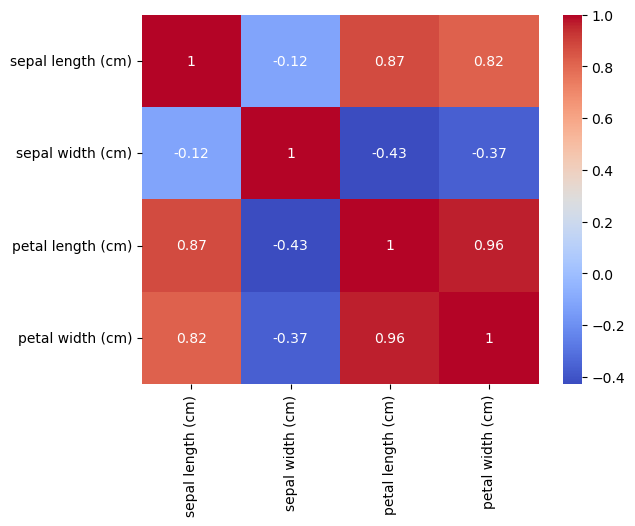

In [76]:
sns.heatmap(iris.corr(), cmap = 'coolwarm',  annot=True),

In [77]:
sns.set(style="whitegrid", color_codes=True)

In [80]:
iris = sns.load_dataset('iris')

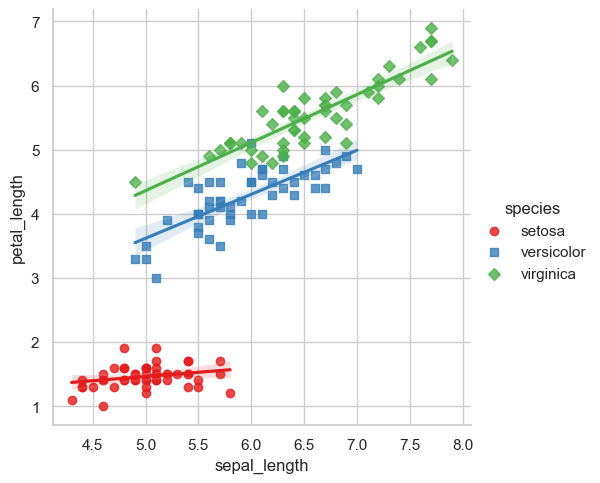

In [82]:
sns.lmplot(x="sepal_length", y="petal_length", hue="species", data = iris, \
              palette="Set1", markers=["o", "s", "D"])

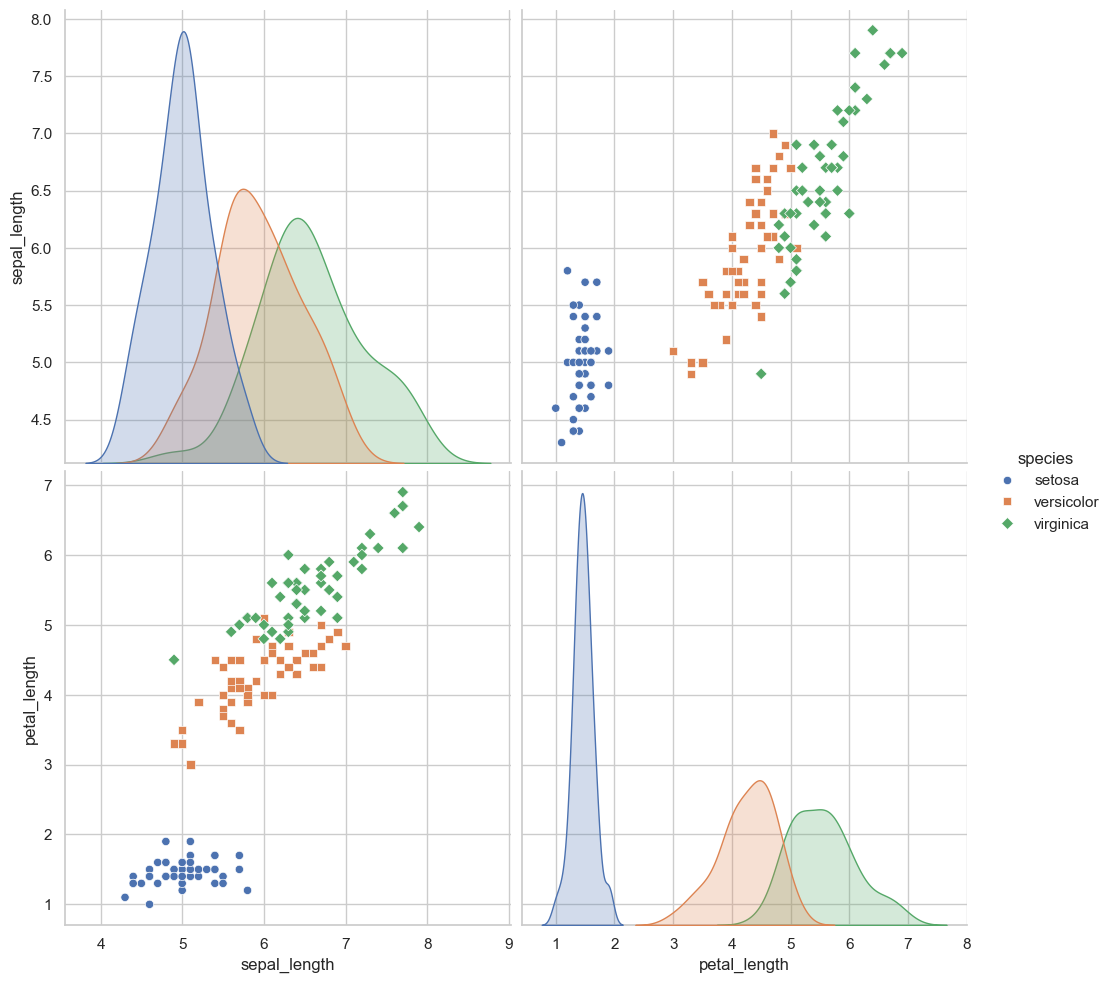

In [84]:
sns.pairplot(iris, height=5, vars=["sepal_length", "petal_length"], \
             markers=["o", "s", "D"], hue="species")

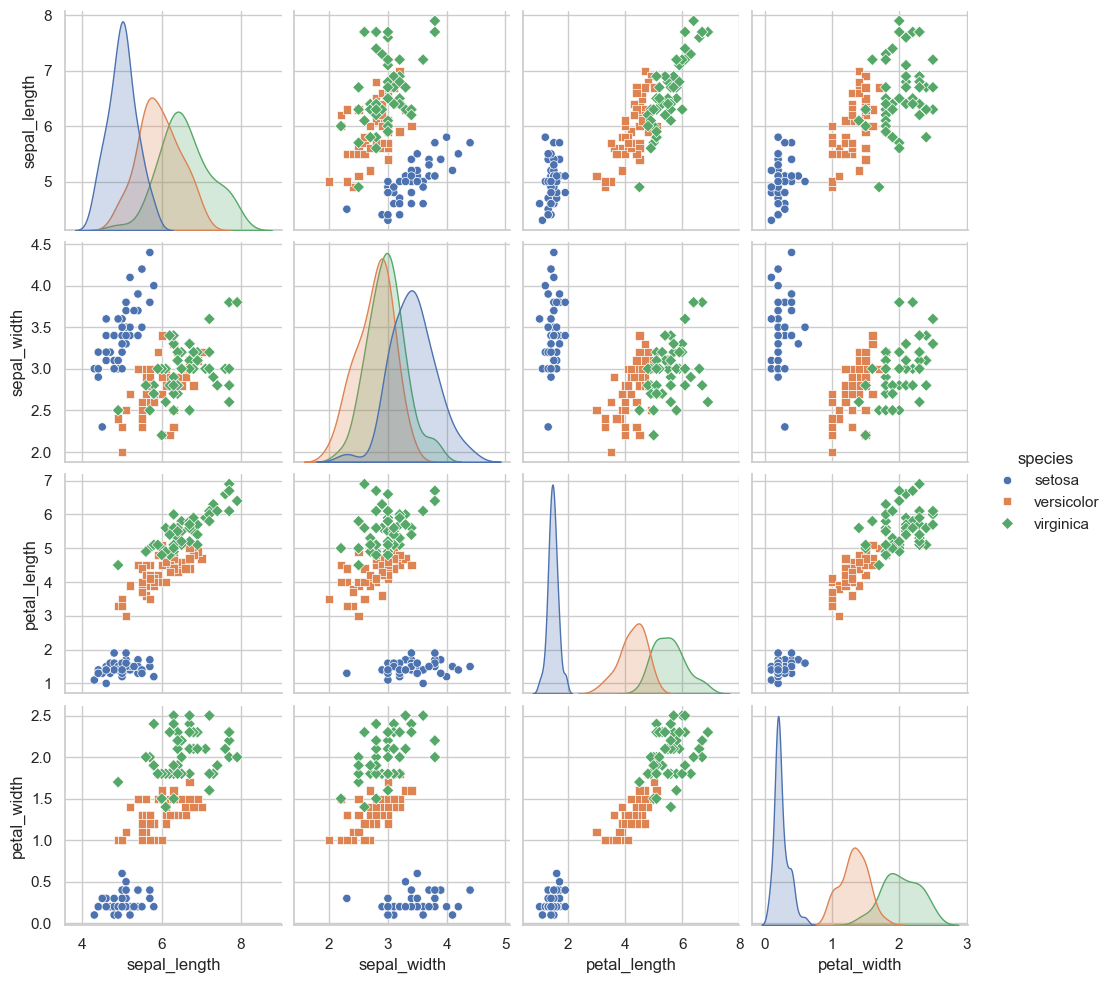

In [85]:
sns.pairplot(iris, markers=["o", "s", "D"], hue="species")

<Axes: >

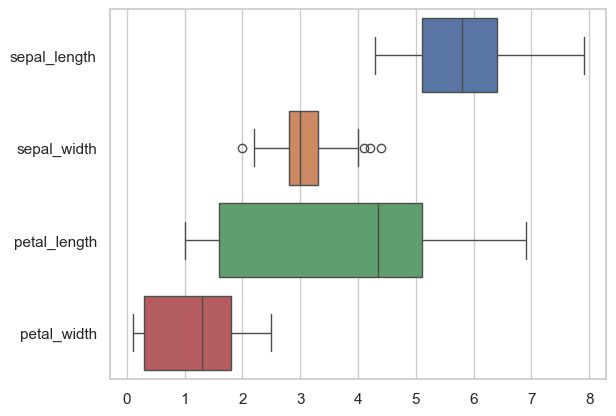

In [86]:
sns.boxplot(data = iris, orient = "h")

<Axes: xlabel='species', ylabel='sepal_length'>

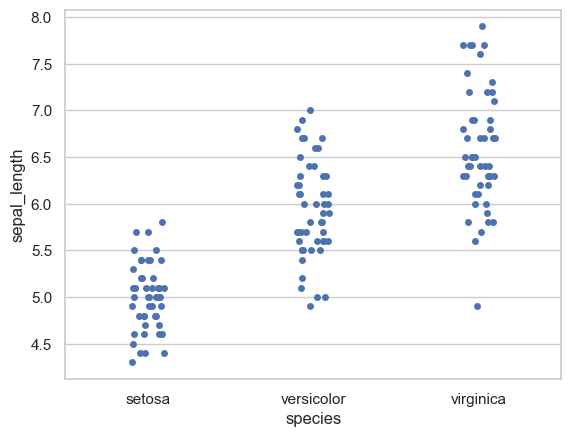

In [87]:
sns.stripplot(x = "species", y = "sepal_length", data = iris)

<Axes: xlabel='species', ylabel='petal_length'>

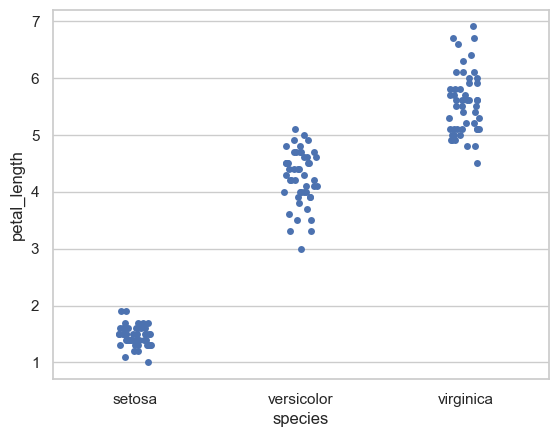

In [88]:
sns.stripplot(x = "species", y = "petal_length", data = iris, jitter = True)

<Axes: xlabel='species', ylabel='petal_length'>

C:\Users\UTSHAB\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


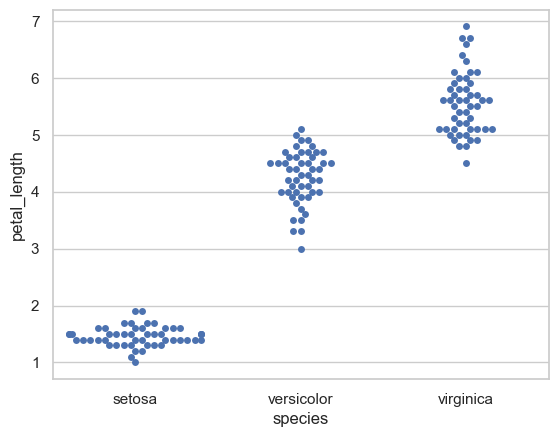

In [89]:
sns.swarmplot(x="species", y="petal_length", data=iris)